<center><font size = "10"> Week 11 - Network Stimulation II and Extracellular recordings<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Gasser Elbanna 
<br>Group member2: Louise Placidet
<br>Group member3: Milo Imbeni

In [1]:
!nrnivmodl

/home/In Silico/Week 11
vecevent.mod
vecevent.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  vecevent.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libnrnmech.so .libs/libnrnmech.so.0 .libs/libnrnmech.so.0.0.0
libtool: link: gcc -shared  -fPIC -DPIC  .libs/vecevent.o .libs/mod_func.o   -Wl,-rpath -Wl,/usr/local/nrn/x86_6

# Ex1. Covariance

<font size='3'>Load the five cells asigned to your group. Connect them randomly with weight 0.1. Attach to a random section of the basal dendritic tree of each cell an ExpSyn with weigth 0.5. Stimulate each cell with a Poissonian stimulation of 75 Hz.

<font size='3'>Using the documentation from the library ELEPHANT, compute the __covariance__ between the spike trains and plot the result.

<font size='3'>What is a Poissonian stimulation? How is it implemented (Hint: look at the elephant source code) Explain the difference between __covariance__, __correlation__ and __coherence__. [2 pts]
    

### Importing useful packages and defining Cell class

In [2]:
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
h.stdinit();

In [3]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()
        
    def build_morphology(self, filename):
        h.load_file('import3d.hoc')
        h.load_file('stdlib.hoc')
        #morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self) # Notice this change to be able to instantiate several cells
    
    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100    # Axial resistance in Ohm * cm
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
        
        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert('hh')
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
        
        if hasattr(self, 'apic'):
            for sec in self.apic:
                sec.insert('hh')
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
        
        for sec in self.dend:
            sec.insert('hh')
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
                
        for sec in self.axon:
            sec.insert('hh')
            for seg in sec:    
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

### Loading our 5 morphologies and connecting them randomly with weight 0.1

In [4]:
Pyr1 = Cell('morph_06.swc','Pyr1','Pyr')
Pyr2 = Cell('morph_07.swc','Pyr2','Pyr')
Pyr3 = Cell('morph_09.swc','Pyr3','Pyr')
cells_Pyr = [Pyr1, Pyr2, Pyr3]
Int1 = Cell('morph_03.swc','Int1','Int')
Int2 = Cell('morph_10.swc','Int2','Int')
cells_Int = [Int1, Int2]
cells = cells_Pyr + cells_Int

error morph_06.swc line 17828: could not parse: 
error morph_07.swc line 19678: could not parse: 
error morph_09.swc line 6173: could not parse: 
error morph_03.swc line 7281: could not parse: 
error morph_10.swc line 3377: could not parse: 


In [5]:
for c in cells_Pyr:
    print('%s: %d apical sections, %d basal sections, %d soma sections and %d axon senctions' % (c.name,len(c.apic),len(c.dend), len(c.soma), len(c.axon)))
for c in cells_Int:
    print('%s: %d basal sections, %d soma sections and %d axon senctions' % (c.name,len(c.dend), len(c.soma), len(c.axon)))

Pyr1: 95 apical sections, 72 basal sections, 2 soma sections and 131 axon senctions
Pyr2: 131 apical sections, 82 basal sections, 2 soma sections and 125 axon senctions
Pyr3: 37 apical sections, 69 basal sections, 2 soma sections and 67 axon senctions
Int1: 45 basal sections, 2 soma sections and 103 axon senctions
Int2: 33 basal sections, 2 soma sections and 120 axon senctions


In [6]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(source, target, weight = None, delay = 5, source_sec = None, source_neurite = 'axon', target_sec = None, target_neurite = 'dend', rng = None, seed = None):
    if rng is None:
        rng = np.random.default_rng(seed)
    
    if weight is None:
        weight = rng.uniform() # random weight
    
    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_)) # random dendritic section
    
    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_)) # random axonal section
    
    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn) # store synapse
    
    netcon = h.NetCon(source_neurite_[source_sec](0.5)._ref_v, target_syn, sec=source_neurite_[source_sec])
    netcon.weight[0] = weight
    netcon.delay = delay
    
    print('Connected cells %s::%s[%d] -> %s::%s[%d] with weight %g and delay %g' % (source.name,source_neurite,source_sec,target.name,target_neurite,target_sec,weight,delay))
    return netcon

In [7]:
netcons = [] # save the netcons in case we want to modify them later

seed = 9 # specify seed for replicability of all that follows
rng = np.random.default_rng(seed)

# Connect Pyr2, Pyr3, Int2 and Int1 to Pyr1
nc = connect(Pyr2,Pyr1,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Pyr1,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Int1,Pyr1,rng = rng,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int2,Pyr1,rng = rng,weight = 0.1,target_neurite='soma')
netcons.append(nc)

# Connect Pyr1, Pyr3, Int1 and Int2 to Pyr2
nc = connect(Pyr1,Pyr2,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Pyr2,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Int1,Pyr2,rng = rng,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int2,Pyr2,rng = rng,weight = 0.1,target_neurite='soma')
netcons.append(nc)

# Connect Pyr1, Pyr2, Pyr3 and Int2 to Int1
nc = connect(Pyr1,Int1,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr2,Int1,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Int1,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Int2,Int1,rng = rng,weight = 0.1, target_neurite='soma')
netcons.append(nc)

# Connect Pyr1, Pyr2, Pyr3 and Int1 to Int2
nc = connect(Pyr1,Int2,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr2,Int2,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Int2,rng = rng,weight = 0.1)
netcons.append(nc)
nc = connect(Int1,Int2,rng = rng,weight = 0.1, target_neurite='soma')
netcons.append(nc)

Connected cells Pyr2::axon[108] -> Pyr1::dend[30] with weight 0.1 and delay 5
Connected cells Pyr3::axon[19] -> Pyr1::dend[69] with weight 0.1 and delay 5
Connected cells Int1::axon[62] -> Pyr1::soma[0] with weight 0.1 and delay 5
Connected cells Int2::axon[93] -> Pyr1::soma[1] with weight 0.1 and delay 5
Connected cells Pyr1::axon[93] -> Pyr2::dend[52] with weight 0.1 and delay 5
Connected cells Pyr3::axon[61] -> Pyr2::dend[75] with weight 0.1 and delay 5
Connected cells Int1::axon[88] -> Pyr2::soma[1] with weight 0.1 and delay 5
Connected cells Int2::axon[110] -> Pyr2::soma[1] with weight 0.1 and delay 5
Connected cells Pyr1::axon[3] -> Int1::dend[0] with weight 0.1 and delay 5
Connected cells Pyr2::axon[54] -> Int1::dend[35] with weight 0.1 and delay 5
Connected cells Pyr3::axon[32] -> Int1::dend[33] with weight 0.1 and delay 5
Connected cells Int2::axon[7] -> Int1::soma[1] with weight 0.1 and delay 5
Connected cells Pyr1::axon[0] -> Int2::dend[22] with weight 0.1 and delay 5
Connec

### Attach to a random section of the basal dendritic tree of each cell an ExpSyn with weigth 0.5

In [8]:
# Place exponential synapses in random cell sections

# Exponential synapses
synapses = []
for cell in cells:
    sec = rng.integers(0, len(cell.dend))
    syn = h.ExpSyn(cell.dend[sec](0.5))
    syn.tau = 2 # ms
    print('ExpSyn created at %s::%s[%s] with tau = %g' % (cell.name,"dend",sec,syn.tau))
    synapses.append(syn)

ExpSyn created at Pyr1::dend[69] with tau = 2
ExpSyn created at Pyr2::dend[25] with tau = 2
ExpSyn created at Pyr3::dend[67] with tau = 2
ExpSyn created at Int1::dend[31] with tau = 2
ExpSyn created at Int2::dend[31] with tau = 2


### Stimulate each cell with a Poissonian stimulation of 75 Hz

In [9]:
# Create stimulators for synapses
stims = []
stim_nc = []
for syn in synapses:
    stim = h.VecStim()
    nc = h.NetCon(stim, syn)
    nc.weight[0] = 0.5 # In units of [nS] due to the gmax scaling factor in our .mod file
    stims.append(stim)
    stim_nc.append(nc)

In [10]:
import elephant.spike_train_generation as elstg
import quantities as pq

# Create a Poissonian spike train
stim_rate = 75 * pq.Hz
stim_tstart = 5 * pq.ms
stim_tstop = 300 * pq.ms

stim_times = []
for stim in stims:
    sptimes = elstg.homogeneous_poisson_process(stim_rate, stim_tstart, stim_tstop, as_array = True)
    spvec = h.Vector(sptimes)
    stim.play(spvec) # make stimulator fire at these times
    stim_times.append(sptimes)
    print(sptimes)

[ 20.17418348  47.5950656   94.05388662 106.91987633 125.93545545
 129.07514325 132.39949022 141.51557054 142.47494041 149.98027156
 160.65455619 180.77613892 184.02665842 190.7833385  203.39709098
 233.86511498 241.60614389 267.72386956]
[  7.35473065  13.20249471  22.9045112   32.47770392  36.69278045
  56.04694368  60.86510178  68.26464602  68.6821944   74.51742138
  95.07675357 104.71581461 108.35487436 114.44544547 125.02485424
 136.10589868 152.10664992 177.24013867 195.41429609 217.84037828
 226.07914754 243.29486063 244.49233967 244.62687708]
[ 22.43089995  28.64357347  36.7541529   47.80914636  77.40418067
  83.76222383  95.58069672 103.96970985 106.66931482 124.26429225
 143.30272449 145.07569066 146.83689597 151.04352585 158.90980684
 178.29262158 178.72946482 202.27935412 243.72975382 255.52607228
 259.50649995 281.38233349 288.80966258 291.80012374]
[ 14.55731376  50.2308222   81.36316506  87.04838857  91.85117325
 101.16856533 108.94764765 110.77847473 131.38514965 145.39

/usr/local/lib/python3.6/dist-packages/elephant/pandas_bridge.py:22: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  DeprecationWarning)


In [11]:
recording_cells = [Pyr1, Pyr2, Pyr3, Int1, Int2]

somaV = []
for cell in recording_cells:
    s = h.Vector().record(cell.soma[0](0.5)._ref_v)
    somaV.append(s)

time = h.Vector().record(h._ref_t)
sim_tstop = 300

h.finitialize(-65)
h.continuerun(sim_tstop)

0.0

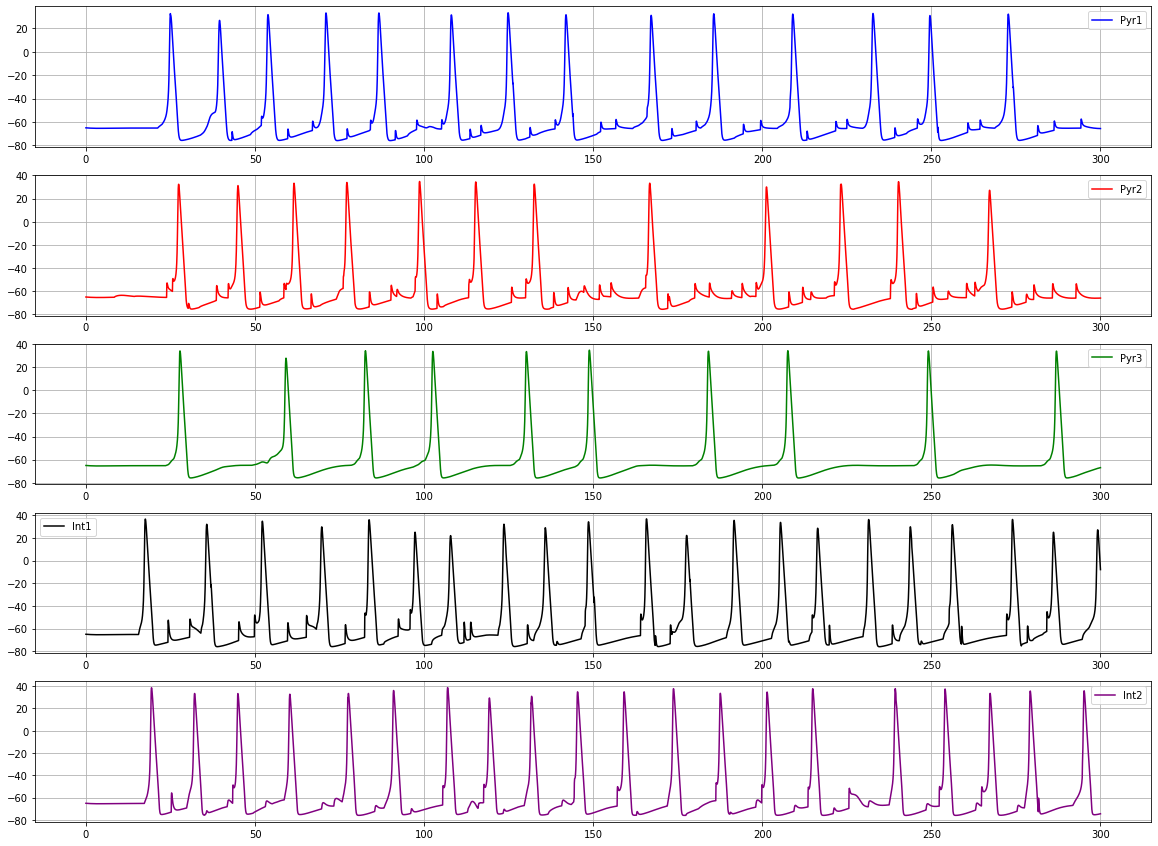

In [17]:
# Plotting the results

colors = ['blue', 'red', 'green','black','purple']

fig = plt.figure(figsize=(20,15))
i = 1
for cell,V,color in zip(recording_cells,somaV,colors):
    axes = fig.add_subplot(5, 1, i)

    axes.plot(time, V, label=cell.name, color=color)
    axes.legend()
    axes.grid(True)
    i += 1

ax.set_xlim((0,sim_tstop))
plt.show()

In [19]:
from neo import AnalogSignal

def spike_detector(voltage, threshold):
    # convert Neuron recording (voltage) to neo.AnalogSignal
    sig = AnalogSignal(voltage,units = pq.mV,sampling_period = 0.025 * pq.ms) # dt = 0.025 ms
    # peak locations
    spike_time = elstg.peak_detection(sig,threshold = threshold * pq.mV,format = 'raw')
    return spike_time * 1000 # in ms

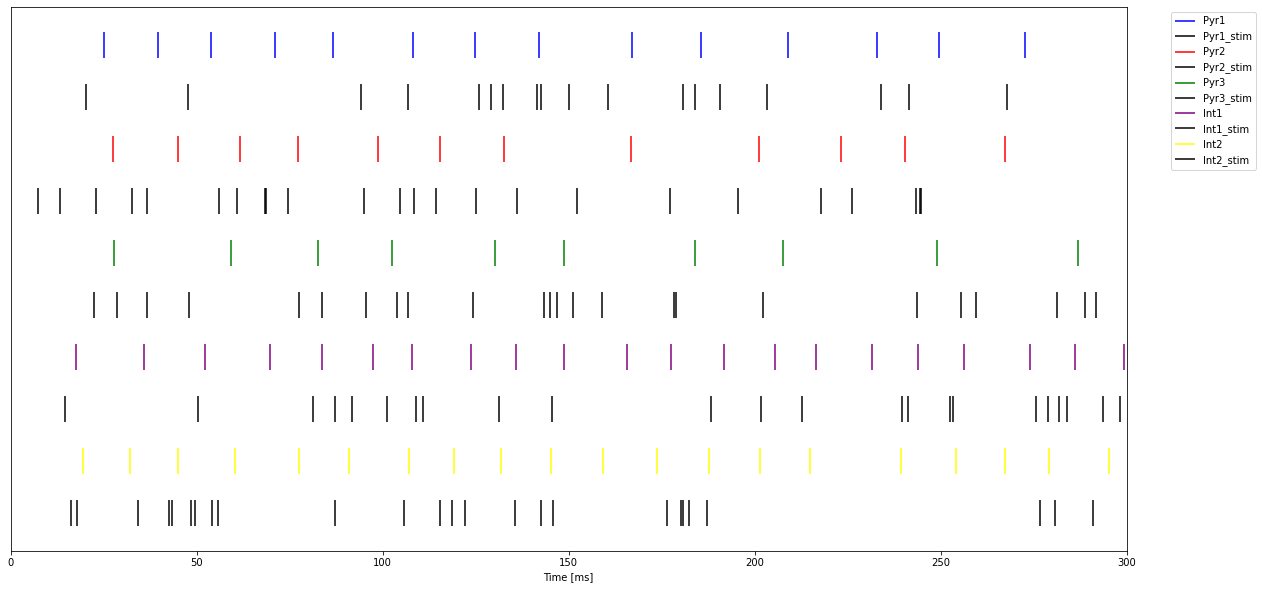

In [24]:
spike_trains = []
for V,st in zip(somaV,stim_times):
    spk = spike_detector(V, -20.0) # tune threshold as needed
    spike_trains.append(spk) # add cell spikes
    spike_trains.append(st)  # add stim spikes
    
name_lst = [[_.name,_.name + '_stim'] for _ in recording_cells]
name_lst = [x for sub in name_lst for x in sub] # https://stackoverflow.com/a/952952

colors = ['blue', 'black', 'red', 'black', 'green', 'black', 'purple', 'black', 'yellow', 'black']

fig, ax = plt.subplots(figsize=(20,10))
for (i,name),spikes,color in zip(enumerate(name_lst),spike_trains,colors):
    ymin = 2 * i * -0.1
    ymax = 2 * i * -0.1 - 0.1
    ax.vlines(spikes, ymin=ymin, ymax=ymax, color=color, label=name)

ax.set_xlim((0,sim_tstop))
ax.set_xlabel("Time [ms]")
ax.set_yticks([])

# Put a legend below current axis
ax.legend(bbox_to_anchor=(1.12, 1))

plt.show()

### Compute the covariance between the spike trains and plot the result

In [29]:
from neo import SpikeTrain
from elephant.conversion import BinnedSpikeTrain
import elephant.spike_train_correlation as elstc

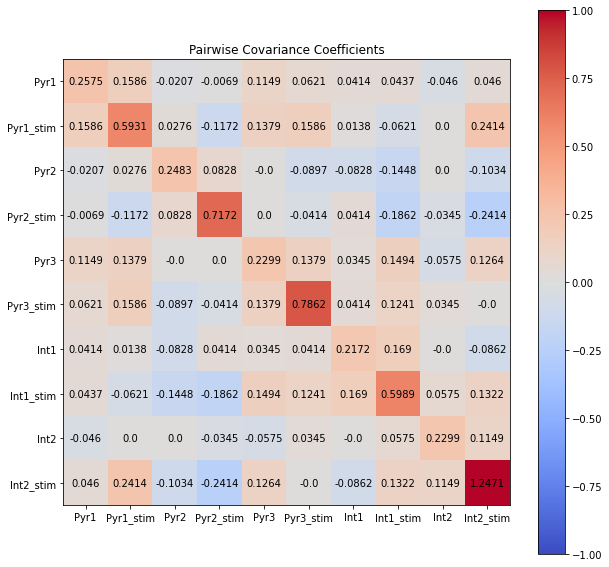

In [35]:
# We bin the spikes in both cell and stim spikes
allspikes = [SpikeTrain(x * pq.ms, t_stop = sim_tstop * pq.ms) for x in spike_trains]
binned_spikes = BinnedSpikeTrain(allspikes, binsize = 10 * pq.ms) # 10 ms bin
# Correlation coefficient matrix between all spike trains
cv_matrix = elstc.covariance(binned_spikes)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cv_matrix, cmap="coolwarm", vmin=-1.0, vmax=1.0, origin = 'upper')

# We want to show all ticks...
ax.set_xticks(np.arange(len(name_lst)))
ax.set_yticks(np.arange(len(name_lst)))
# ... and label them with the respective list entries
ax.set_xticklabels(name_lst)
ax.set_yticklabels(name_lst)

# Loop over data dimensions and create text annotations.
for i in range(len(name_lst)):
    for j in range(len(name_lst)):
        text = ax.text(j, i, np.round(cv_matrix[i, j],4),
                       ha="center", va="center", color="black")

ax.set_title('Pairwise Covariance Coefficients')
plt.colorbar(im)
plt.show()

### ___Question___: What is a Poissonian stimulation? How is it implemented (Hint: look at the elephant source code). Explain the difference between covariance, correlation and coherence

_What is a Poissonian stimulation?_

According to ["Poisson process stimulation of an excitable membrane cable model"](https://www.sciencedirect.com/science/article/pii/S0006349586834361), a Poisson stimulation consists in a sequence of stimuli following a Poisson distribution.  According to this paper, a Poisson process, (also referred to nuclear disintegration), is used to represent the result of convergence as trains of stimulus pulses whose amplitudes and durations were fixed or varied randomly in respective runs.

_How is this Poissonian stimulation implemented?_

The Poissonian stimulation is implemented in elephant can be either: a homogeneous poisson process, or an inhomogeneous poisson process.  According to its [source code](https://elephant.readthedocs.io/en/latest/_modules/elephant/spike_train_generation.html#homogeneous_poisson_process), we can get a more precise idea of how they code it:

- for the homogeneous poisson process: the function takes as input the rate, the beginning and ending times of the stimulation, as well as the option of a refractory period.
    - it then returns a spike train, whose spikes are a realization of a Poisson process with the given input rate, startig at the given start time and stopping at the given stop time.

Indeed, for a homogeneous Poisson Process, the probability of finding a spike in a short segment of duration $\Delta t$ is:
$P_F(t;t+\Delta t) = \nu .\Delta t$ with $\nu$ the rate (which is the input in the elephant code)
    
- for the case of inhomogeneous poisson process: the function takes as input the rate
    - it returns the spike train with spikes that are a realization of an inhomogeneous poisson porcess with a given rate profile

Indeed, for the inhomogeneous Poisson Process, the reasoning is the same as for the homogeneous process except that now the rate ($\nu$) is no longer a constant rate ($\nu_0$), but is a function of time ($\nu(t)$).


_Explain the difference between covariance, correlation and coherence:_

- The __covariance__ measures the relationship between two signals, and more specifically, it evaluates its similarity.  Indeed, it is a measure which represents how strong two random variables are related to each other, not only the kind of relation (in terms of direction).  The correlation values are standardized (values between -1 and +1), which enables us to use this measure to compare the strength or weakness of the relationship (wheras covariance is not standardized and the magnitude has no direct significance).  According to [this source](https://www.originlab.com/doc/Tutorials/Coherence-and-Correlation#:~:text=Coherence%20measures%20the%20degree%20of,testing%20for%20similar%20frequency%20components.&text=Correlation%20is%20another%20measure%20of,is%20used%20to%20evaluate%20similarity.), if two signals have a high degree of similarity, the magnitude of the correlation coefficient is large. On the other hand, if there is little or no relationship between the two signals, the magnitude of the covariance is small.

Correlation between 2 variables:
$$ Corr(x,y) = \frac{Cov(x, y)}{\sigma_x \sigma_y}$$

- The __coherence__ measures the degree of linear dependence of two signals by testing for similar frequency components: if two signals correspond to each other perfectly at a given frequency, the magnitude of coherence is 1.  Otherwise, if they dont correspond, the value will be 0

Coherence between 2 variables:
$$ Coherence_{(X,Y)}(f)^2 =  \frac{|P_{X,Y}(f)|^2}{P_{X,X}(f)P_{Y,Y}(f)}$$

- The __covariance__ indicates according to [this source](https://www.mygreatlearning.com/blog/covariance-vs-correlation/#differencebetweencorrelationandcovariance) the direction of the linear relationshpi between two variables: meaning if the variables are directly proportional or inversly proportional to each other (meaning that increasing the value of one variable might have a positive or negative impact on the value of the other variable).  Their values might be any number between the two opposite infinities: it measures how two variables change together, not the dependency of one variable on another.

Covariance between 2 variables: 
$$ Cov(X, Y) = E[(X-E[X])(Y-E[Y])]$$

# Ex2. Extracellular response of synaptic imput

<font size='3'>Choose one pyramidal cell from your set of morphologies and run tutorial 03 but replacing the morphology file by the one you chose. Be careful with the rotation angles, the cell has to be aligned with the line of electrodes.

<font size='3'>Explain what do you see on the final plots. Explain the calculation that is performed by RecExtElectrode to get the recorded voltage (Hint: Look at the default "method" parameter for RecExtElectrode)  [1.5 pts]
    
<span style="color:red"> Restart kernel out of precaution...

### Importing libraries and loading one pyramidal cell:

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cellParameters = {
    'morphology' : 'morph_06.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

z = np.mgrid[-800:1201:100]
electrodeParameters = {
    'x' : np.zeros(z.size),
    'y' : np.zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [9]:
# CHANGE THIS

cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(x=1.57079632679, y=0.0, z=1.57079632679, rotation_order='xyz') # angles in radians!!


synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=300),
                       **synapseParameters)
synapse.set_spike_times(np.array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(**electrodeParameters)

error morph_06.swc line 17828: could not parse: 


In [10]:
cell.simulate(electrode = electrode)

(-1000.0, 1000.0, -800.0, 1200.0)

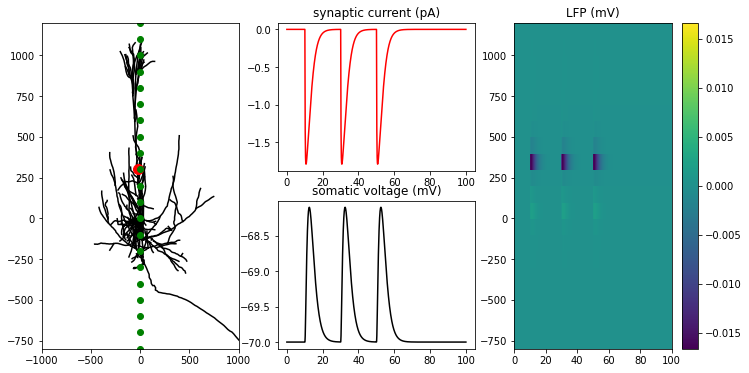

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(133)
plt.pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
plt.colorbar()
plt.title('LFP (mV)')

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, 'r'), plt.title('synaptic current (pA)')

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, 'k'), plt.title('somatic voltage (mV)')

plt.subplot(131)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plt.plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plt.plot([cell.synapses[0].x], [cell.synapses[0].z], 
     color='r', marker='o', markersize=10)
plt.plot(electrode.x, electrode.z, '.', marker='o', color='g')
plt.axis([-1000, 1000, -800, 1200])

### Explain what do you see on the final plots. Explain the calculation that is performed by RecExtElectrode to get the recorded voltage (Hint: Look at the default "method" parameter for RecExtElectrode)

_What we see on the final plots_:
    
    
_Explain the calculation that is performed by RecExtElectrode to get the recorded voltage_:


# Ex3. EEG

<font size='3'>Choose one pyramidal cell and one inhibitory cell from your set of cells. Run the code from tutorial 04 for each of the cells and compare the current dipoles. Explain what differences do you see and why. Find a set of EEG electrodes that results in a large difference in the recorded signal between the two cells. [2.5 pts] 

In [ ]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_cell_to_ax(cell, ax, synidxs):
    for idx in range(cell.totnsegs):
        if idx == 0:
            ax.plot(cell.x[idx].mean(), cell.z[idx].mean(), 'ko')
        else:
            ax.plot(cell.x[idx], cell.z[idx], c='k')

    for synidx in synidxs:
        l, = ax.plot(cell.x[synidx].mean(), cell.z[synidx].mean(), '*',
                     c="r", ms=10)
    ax.legend([l], ["Synapse"], frameon=False, bbox_to_anchor=[1, -0.1])


def plot_EEG_sphere(fig, eeg, x_eeg, y_eeg, z_eeg):
    ax = fig.add_subplot(322, projection='3d',
                         title="Max EEG potential\nat 4-sphere surface")
    vmax = 6
    vmin = -vmax

    def clr(phi):
        return plt.cm.PRGn((phi - vmin) / (vmax - vmin)) 

    clrs = clr(eeg)
    print(clrs)
    print(clrs.shape)
    ax.plot_surface(x_eeg.reshape(num_theta, num_phi),
                    y_eeg.reshape(num_theta, num_phi),
                    z_eeg.reshape(num_theta, num_phi),
                    rstride=1, cstride=1, facecolors=clrs,
                    linewidth=0, antialiased=False)

    # ax.set_aspect('equal') # Raises NotImplementedError in MPL currently
    ax.axis('off')
    ax.set_xlim3d(-65000, 65000)
    ax.set_ylim3d(-65000, 65000)
    ax.set_zlim3d(-65000, 65000)
    ax.view_init(10, 0)

    # colorbar
    cax = fig.add_axes([0.65, 0.75, 0.25, 0.01])
    m = plt.cm.ScalarMappable(cmap=plt.cm.PRGn)
    ticks = np.linspace(vmin, vmax, 5)  # global normalization
    m.set_array(ticks)
    cbar = fig.colorbar(m, cax=cax,
                        extend='both', orientation='horizontal')
    cbar.outline.set_visible(False)
    cbar.set_ticks(ticks)
    cbar.set_label(r'$\phi$ (pV)', labelpad=1.)

In [ ]:
# four_sphere properties
radii = np.array([79000, 80000, 85000, 90000])
sigmas = [0.3, 1.5, 0.015, 0.3]
rad_tol = 1e-2

# simulate cell
syn_loc = (0, 0, 1000)

### For the Pyramidal Cell:

In [ ]:
cellParameters1 = {
    'morphology' : 'morph_06.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters1 = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

In [ ]:
# create cell with parameters in dictionary
cell1 = LFPy.Cell(**cellParameters1)
pos1 = syn_loc1
synapseParameters1['idx'] = cell1.get_closest_idx(x=pos1[0], y=pos1[1], z=pos1[2])
synapse1 = LFPy.Synapse(cell1, **synapseParameters1)
synapse1.set_spike_times(np.array([5.]))

cell1.simulate(rec_imem=True,rec_vmem=True)


In [ ]:
# compute dipole
P1= LFPy.get_current_dipole_moment(np.c_[cell1.xmid,cell1.ymid,cell1.zmid],cell1.imem)
P1 = P1[0]

In [ ]:
somapos1 = np.array([0., 0., 77500])
r_soma_syns1 = [
    cell1.get_intersegment_vector(
        idx0=0,
        idx1=i) for i in cell.synidx]
r_mid1 = np.average(r_soma_syns1, axis=0)
r_mid1 = somapos1 + r_mid1 / 2.

In [ ]:
eeg_coords_top1 = np.array([[0., 0., radii[3] - rad_tol]])
four_sphere_top1 = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top1 = four_sphere_top1.calc_potential(P1, r_mid1)
eeg_top1 = np.array(pot_db_4s_top1) * 1e9

In [ ]:
eeg_coords_bot1 = np.array([[0., -radii[3] + rad_tol,0.]])
four_sphere_bot1= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot1 = four_sphere_bot1.calc_potential(P1, r_mid1)
eeg_bot1 = np.array(pot_db_4s_bot1) * 1e9

eeg1 = eeg_top1-eeg_bot1

plt.figure()
plt.plot(eeg1.T)

### For the Inhibitory Cell:

In [ ]:
cellParameters2 = {
    'morphology' : 'morph_03.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters2 = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

In [ ]:
# create cell with parameters in dictionary
cell2 = LFPy.Cell(**cellParameters2)
pos2 = syn_loc2
synapseParameters2['idx'] = cell2.get_closest_idx(x=pos2[0], y=pos2[1], z=pos2[2])
synapse2 = LFPy.Synapse(cell, **synapseParameters2)
synapse2.set_spike_times(np.array([5.]))

cell2.simulate(rec_imem=True,rec_vmem=True)


In [ ]:
# compute dipole
P2= LFPy.get_current_dipole_moment(np.c_[cell2.xmid,cell2.ymid,cell2.zmid],cell2.imem)
P2 = P[0]

In [ ]:
somapos2 = np.array([0., 0., 77500])
r_soma_syns2 = [
    cell2.get_intersegment_vector(
        idx0=0,
        idx1=i) for i in cell.synidx]
r_mid2 = np.average(r_soma_syns2, axis=0)
r_mid2 = somapos2 + r_mid2 / 2.

In [ ]:
eeg_coords_top2 = np.array([[0., 0., radii[3] - rad_tol]])
four_sphere_top2 = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top2 = four_sphere_top.calc_potential(P2, r_mid2)
eeg_top2 = np.array(pot_db_4s_top2) * 1e9

In [ ]:
eeg_coords_bot2 = np.array([[0., -radii[3] + rad_tol,0.]])
four_sphere_bot2= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot2 = four_sphere_bot2.calc_potential(P2, r_mid2)
eeg_bot2 = np.array(pot_db_4s_bot2) * 1e9

eeg2 = eeg_top2-eeg_bot2

plt.figure()
plt.plot(eeg2.T)